# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**


* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 

# **Loading Dataset and Importing Modules**

In [2]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import pkg_resources


In [1]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


##Mount the drive and import the datset

In [3]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load the seol bike data set from drive
df=pd.read_excel("/content/drive/MyDrive/capstone project 3 ML/default of credit card clients (1).xls",header = 1)

# **Understand More About The Data**

###top five rows

In [5]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###bottom five rows

In [6]:
# View the data of bottom 5 rows to take a glimps of the data

df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(30000, 25)


In [8]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
#print the unique value
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [11]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* ***This Dataset contains 30000 lines and 25 columns.*** 

* ***default payment next month is our target variable we need to focus on this***


##Features description

**Breakdown of Our Features:**

***We have records of 30000 customers. Below are the description of all features we have***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

**NOTE:-**

 **What do 0 and -2 mean in PAY_X columns?**

***From dataset documentation:***

**PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation**. 
 
#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [12]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

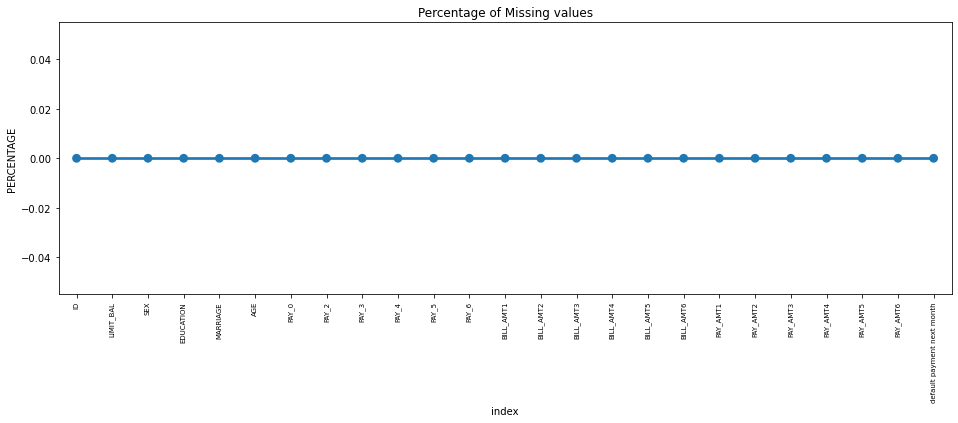

In [13]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

**Why is it important to remove duplicate records from my data?** 
* ***"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [14]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

# **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

**What does 'default.payment.next.month' mean?**

***Is it a predictor or actual data that was collected in the next month - Oct. 2005? According to the reply from the dataset contributor,it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.***

In [15]:
#renaming for better convinience
df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [16]:
# counts the dependent variable data set
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [17]:
# Get the proportion of customers who had default payment in the next month  
# About 22% customers had default payment next month

df['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

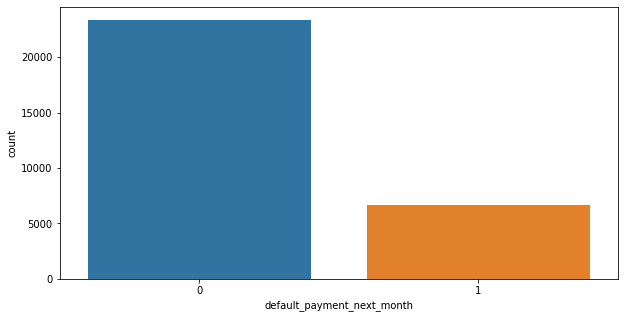

In [18]:
#plotting the count plot to vizualize the data distribution 
#plot the count plot to check the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data =df)

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**



***As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.***




## **Analysis of Independent Variable:**

## **Categorical  Features**

We have few categorical features in our dataset that are***
*   sex
*   education
*   marraige 
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***

 ***Let'Check how they are related with out target class.***


In [19]:
# counts the SEX variable data set
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

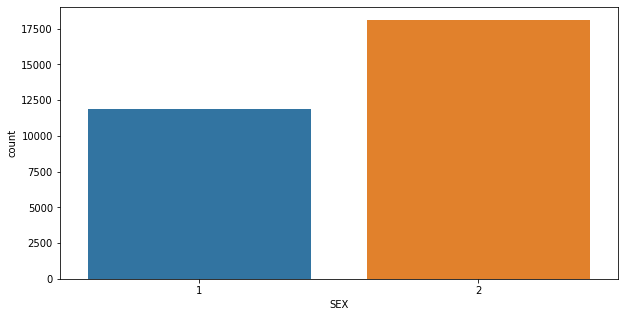

In [20]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

**Education**



 **1 = graduate school; 2 = university; 3 = high school; 0 = others**

In [21]:
# counts the education  data set variable data set
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.***




In [22]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

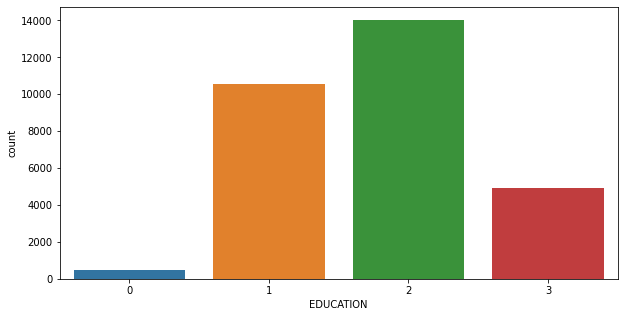

In [23]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)

**From the above data analysis we can say that**
*   ***More number of credit holders are university students followed by Graduates and then High school students.***

**Marriage**


**1 = married; 2 = single; 3 = others**

In [24]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [25]:
# counts the education  data set
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [27]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

***'MARRIAGE' column: what does 0 mean in 'MARRIAGE'?***
***Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.***

In [28]:
# Combine 0 and 3 by changing the value 0 into others

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

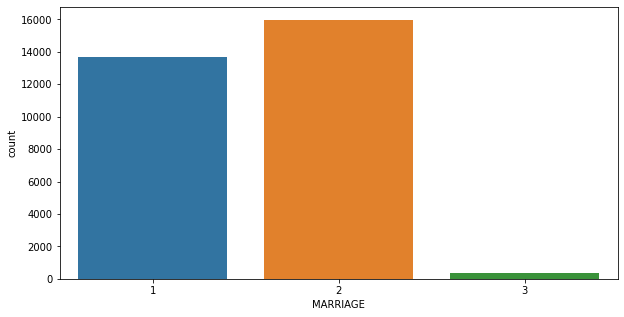

In [29]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)




**From the above data analysis we can say that**
*   **1 - married**
*   **2 - single**
*   **3 - others**
*   ***More number of credit cards holder are Single.***


 **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [30]:
# counts the education  data set
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [31]:
#check the mean of the age group rescpective to the default_payment_next_month
df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [32]:
df = df.astype('int')

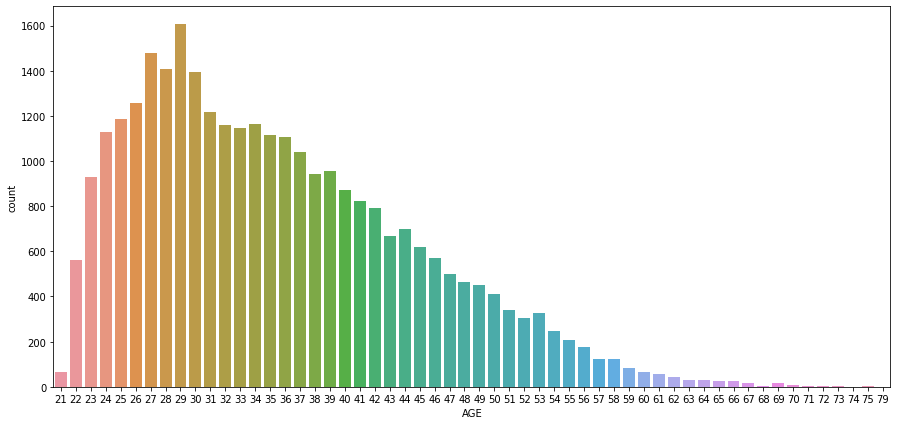

In [35]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = df)
plt.show()

**From the above data analysis we can say that**

> Indented block


*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***



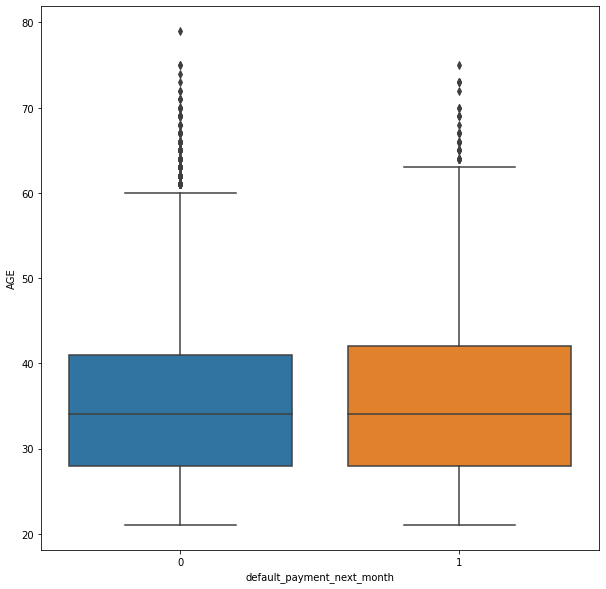

In [36]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=df)

## **Numerical features**


**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

### **Limit Balance**

In [37]:
# describe  the limit balance  data set
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

***Distribution of LIMIT_BAL.***

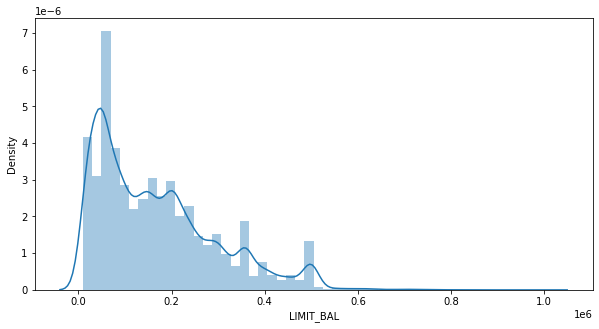

In [38]:
#plotting the dist plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True)
plt.show()

**From the above data analysis we can say that**
* ***Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.***

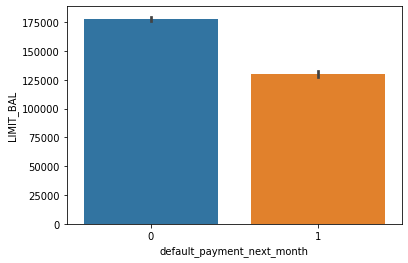

In [40]:
#plotting the bar plot to vizualize the data distribution
sns.barplot(x='default_payment_next_month', y='LIMIT_BAL', data=df)

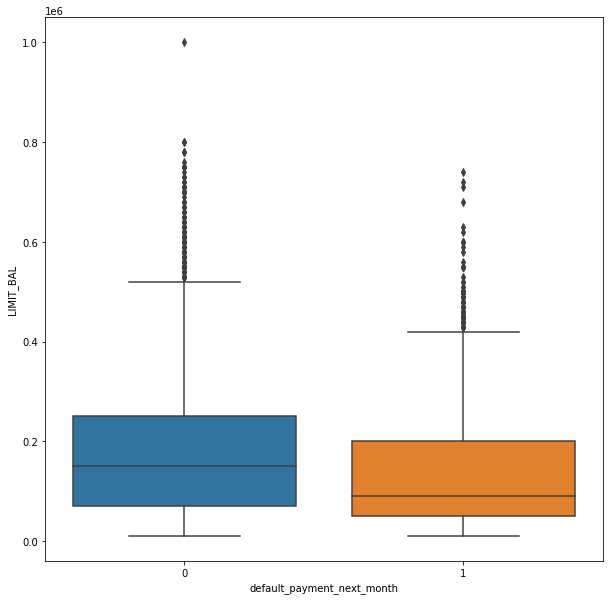

In [42]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=df)



##**Renaming columns**

In [43]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [44]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [45]:
#top ten rows 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###**Total Bill Amount**

**What does SNS Pairplot do?**
* ***pairplot. Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.***

In [48]:
#assign the bill amount variable to a single variable 
total_bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
total_bill_amnt_df.head()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


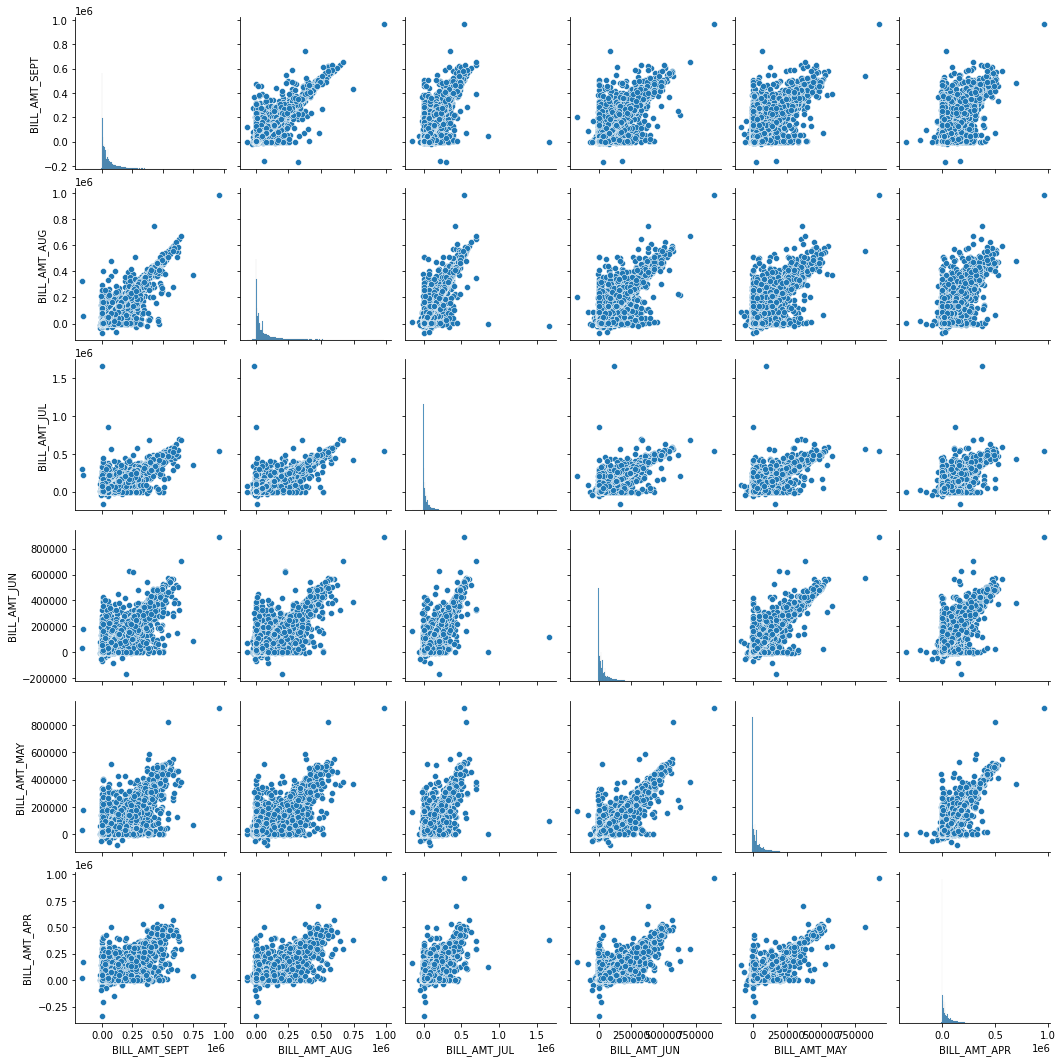

In [49]:
#plotting the pair plot for bill amount 
sns.pairplot(data = total_bill_amnt_df)

 **Previous payment status**

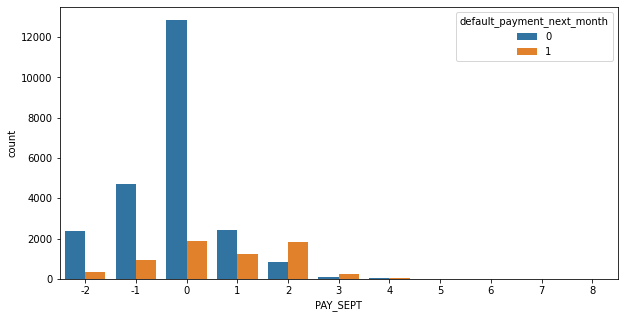

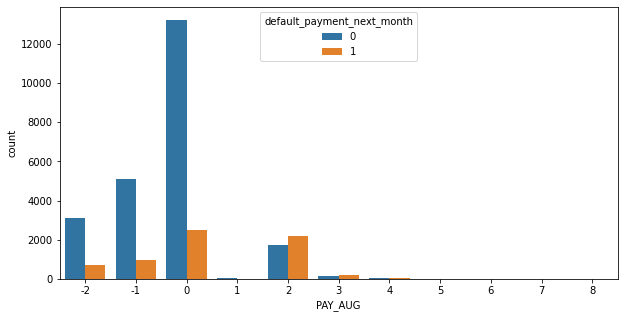

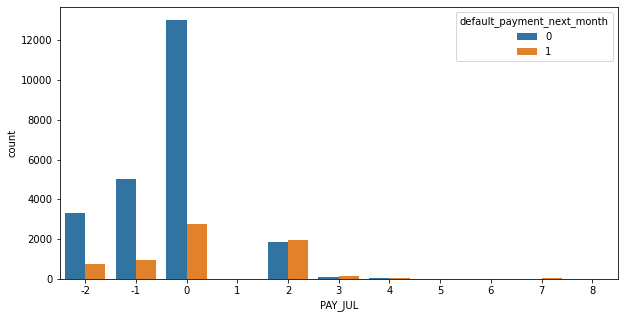

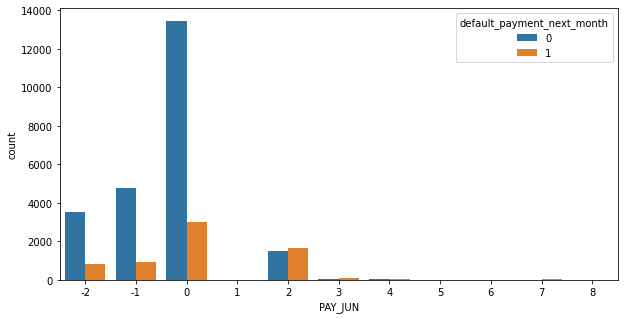

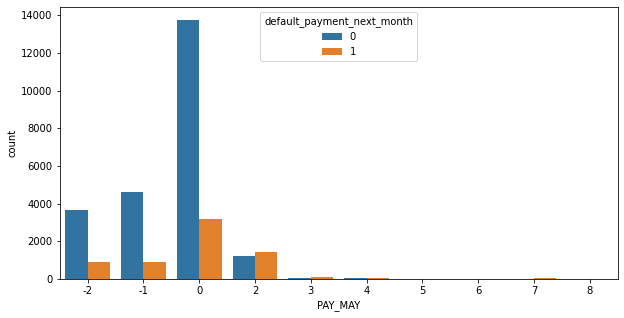

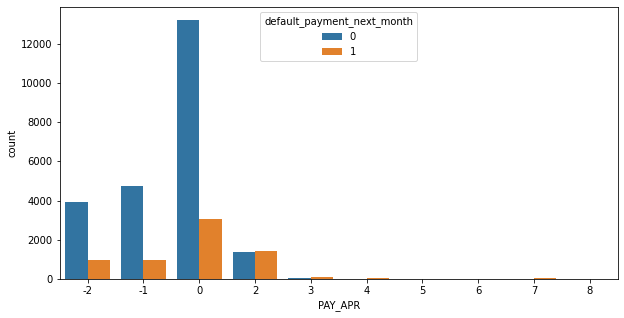

In [50]:
#plotting the count plot for Previous payment status
pre_payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = df)

**Paid Amount**

In [51]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default_payment_next_month']]

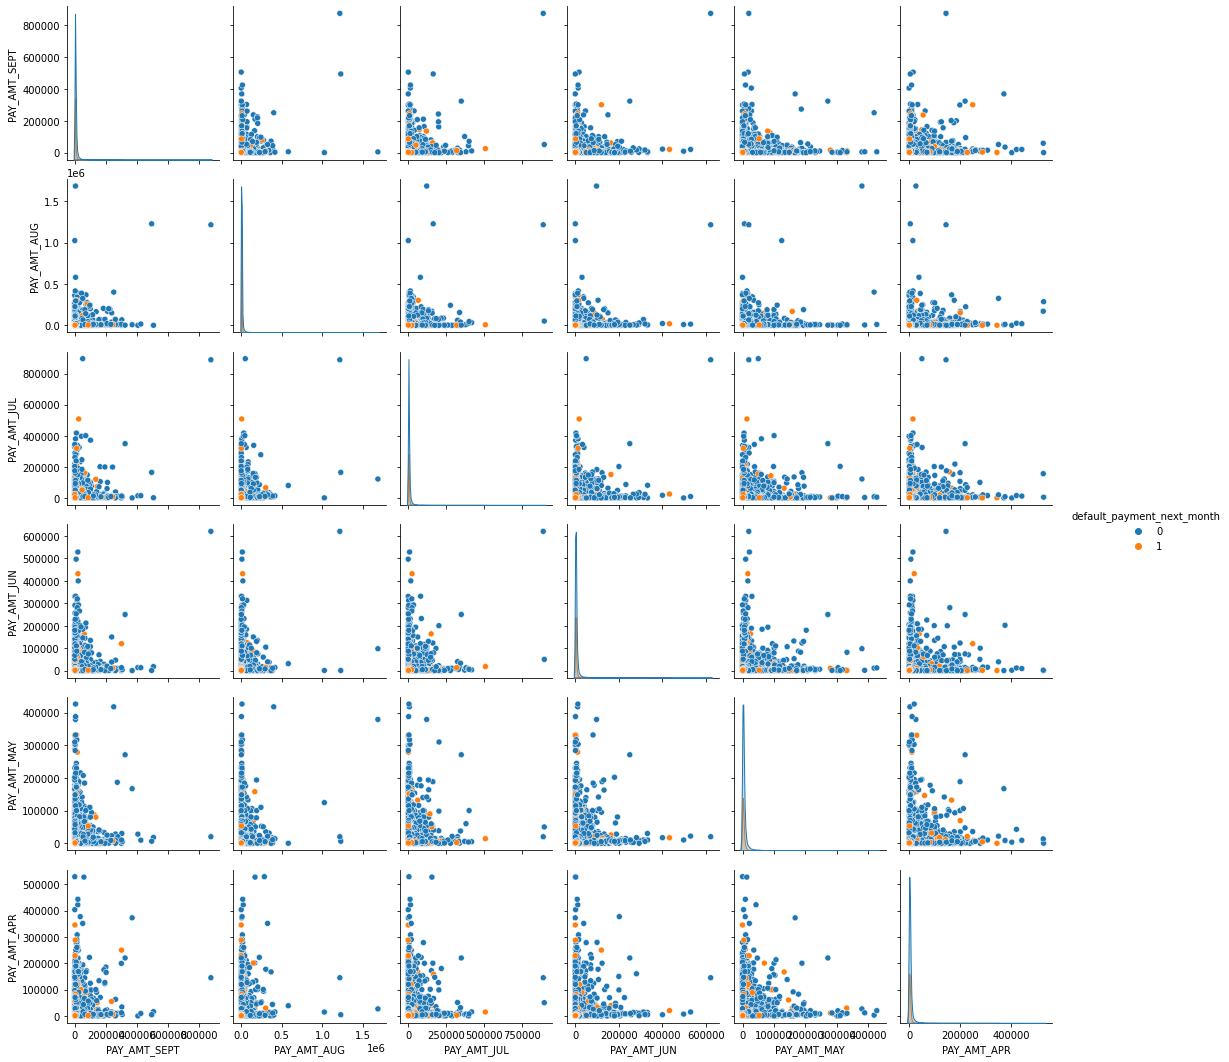

In [52]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='default_payment_next_month')

In [53]:
df.shape

(30000, 25)

**Bivariate Analysis**

**what is bivariate analysis**
* ***Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association***

**Sex and default_payment_next_month**

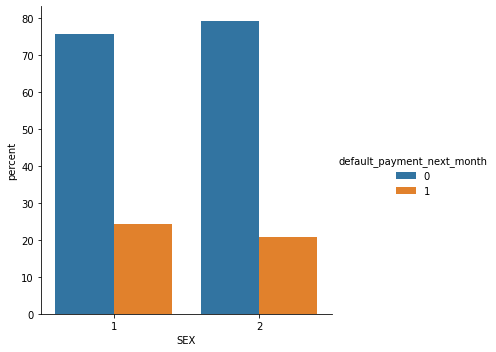

In [54]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***It is evident from the above graph that the number of defaulter have high proportion of males.***